## The Battle of Neighborhoods 

### Problem Introduction

Lot of people migrate to Canada with there family in search of Better Life standered, and because of that most of the time People waste their time/money/energy in search of better Neighborhoods with good housing prices and reputated schools for their children ease of accessing to Cafe, School, Super market, medical shops, grocery shops, mall, theatre, hospital, like minded people, etc.

This Project aim to create an model of features for a people migrating to Scarborough in search a best neighborhood as a comparative analysis between neighborhoods. The features include median housing price and better school according to ratings, crime rates of that particular area, road connectivity, weather conditions, good management for emergency, water resources both freash and waste water and excrement conveyed in sewers and recreational facilities.

It will help people to get awareness of the area and neighborhood before moving to a new city, state, country or place for their work or to start a new fresh life.

### Whome it Concern

All the new Migrants who are migrating to Scarborough from corners of the world can use this model to find suitable home for themselves to live and prosper.

### Problem to solve

1. Sorted list of house in terms of housing prices in a ascending or descending order
2. Sorted list of schools in terms of location, fees, rating and reviews

### Data Discription

Data: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

Will use Scarborough dataset which we scrapped from wikipedia on Week 3. Dataset consisting of latitude and longitude, zip codes

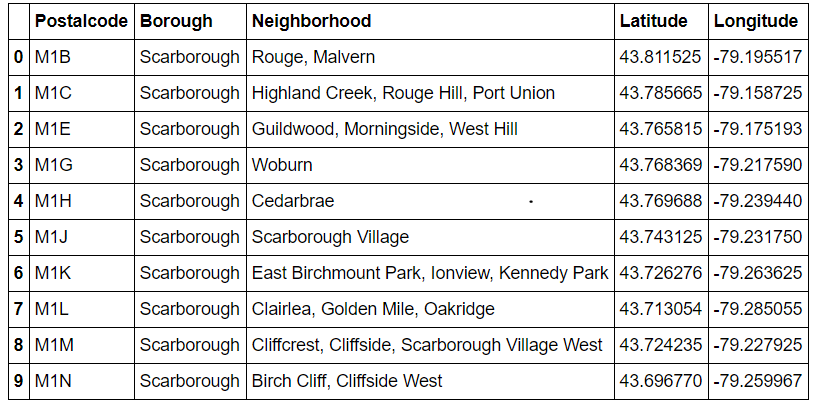

### Data Flow

Using credentials of Foursquare API features of near-by places of the neighborhoods will be fetched. 
places per neighborhood parameter: 100
radius parameter: 500

### Foursquare API

foursquare api is used for gathering required info for the Scarborough, especially foursquare places API which provides the ability to perform location search, location sharing and details about a business.

### Machine learning Technique (Clustering Approach)
To compare the similarities of two cities, we decided to explore neighborhoods, segment them, and group them into clusters to find similar neighborhoods in a big city like New York and Toronto. To be able to do that, we need to cluster data which is a form of unsupervised machine learning: k-means clustering algorithm

### Libraries Used

Pandas: For creating dataframes.

Folium: Python visualization library

Scikit Learn: k-means clustering.

JSON:  handle JSON files.

XML: To separate data from presentation and XML stores data in plain text format.

Geocoder:  Location Data.

Beautiful Soup and Requests: To scrap and library to handle http requests.

Matplotlib: Python Plotting Module.